In [1]:
import os
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from dataclasses import dataclass

src_directory = '../src'
os.chdir(src_directory) #assure that the cwd is set to the src folder

from main import main
from Agent import AgentFeatures
from Environment import EnvironmentFeatures

## Experiment X

In [2]:
env_features = EnvironmentFeatures(
    grid_size = 10,
    num_agents = 10,
    num_foods = 5,
)

agent_features = AgentFeatures(
    speed = 1,  # agent will take a step of lenght 1 on the grid of size 10 
    energy = np.inf,  # not using energy constraint
    size = 100,  # not implemented yet but we'll have to 
    sense = 1.0
)

n_days = 30

In [3]:
agents_per_day = main(env_features, agent_features, n_days)

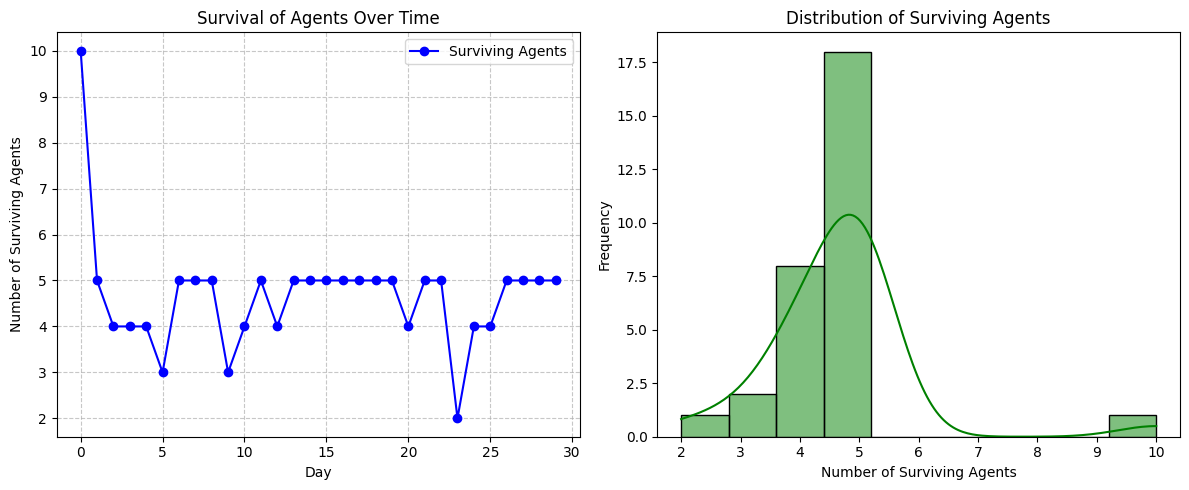

In [4]:
number_agents_per_day = [len(_) for _ in agents_per_day.values()]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(number_agents_per_day, marker='o', linestyle='-', color='b', label='Surviving Agents')
ax1.set_xlabel('Day')
ax1.set_ylabel('Number of Surviving Agents')
ax1.set_title('Survival of Agents Over Time')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.legend()

sns.histplot(number_agents_per_day, ax=ax2, bins=10, color='g', kde=True)
ax2.set_xlabel('Number of Surviving Agents')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Surviving Agents')

plt.tight_layout()
plt.show()